# Exploratory Data Analysis

## Load the Data and Data preprocessing 

In [67]:
## load the library
import numpy as np
import pandas as pd
import sidetable
import warnings
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from scipy import stats
import datetime
import statsmodels.api as sm
import itertools
warnings.filterwarnings('ignore')

In [9]:
## load the data
qcell = pd.read_csv('data-for-test2.csv')

# Data Understanding and Diagnosis 

## Data Dimension 200,000 * 5 

In [10]:
## check data structure 
qcell.info() ## We can understand total 200000 observations 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   datetime     200000 non-null  object 
 1   irradiance   200000 non-null  float64
 2   humidity     200000 non-null  float64
 3   temperature  200000 non-null  float64
 4   energy       200000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 7.6+ MB


In [11]:
## check head(10)
qcell.head(10)

,datetime,irradiance,humidity,temperature,energy
0,1/1/2016 0:00,0.000,72.7,21.556,0.0
1,1/1/2016 0:05,0.000,73.0,21.556,0.0
2,1/1/2016 0:10,0.396,73.3,21.500,0.0
3,1/1/2016 0:15,0.791,73.3,21.389,0.0
4,1/1/2016 0:20,0.396,73.3,21.278,0.0
5,1/1/2016 0:25,0.791,73.4,21.278,0.0
6,1/1/2016 0:30,0.791,73.2,21.278,0.0
7,1/1/2016 0:35,0.396,73.1,21.278,0.0
8,1/1/2016 0:40,0.396,73.1,21.167,0.0
9,1/1/2016 0:45,0.396,73.5,21.056,0.0


In [12]:
## check tail 10
qcell.tail(10)

,datetime,irradiance,humidity,temperature,energy
199990,1/7/2018 16:50,705.247,56.5,26.000,14.45
199991,1/7/2018 16:55,562.017,57.0,26.389,12.84
199992,1/7/2018 17:00,602.656,56.5,26.278,14.23
199993,1/7/2018 17:05,586.301,57.4,25.889,12.06
199994,1/7/2018 17:10,453.975,58.0,26.000,14.31
199995,1/7/2018 17:15,193.286,58.1,25.556,7.73
199996,1/7/2018 17:20,557.061,57.1,25.889,8.01
199997,1/7/2018 17:25,528.811,58.2,25.667,10.39
199998,1/7/2018 17:30,347.915,58.3,25.889,8.74
199999,1/7/2018 17:35,112.998,58.8,25.278,6.03


# Statistical Summary

In [13]:
### Check the count kf non-missing observations and summary statistics in luding 33rd and 67th quantitles
## Denifitely we can see the outlier for example temperature(max)
qcell.describe(percentiles = [.33, .67])

,irradiance,humidity,temperature,energy
count,200000.000000,200000.000000,200000.000000,200000.00000
mean,232.301818,63.110297,24.211174,4.60510
std,565.702460,16.145131,82.107061,12.20258
min,0.000000,0.000000,-17.778000,0.00000
33%,2.373000,58.200000,23.167000,0.00000
50%,4.351000,64.700000,24.667000,0.00000
67%,238.882000,70.900000,26.278000,6.00000
max,144552.000000,90.800000,25948.800000,3390.00000


## Dealing with Missing data

In [14]:
## check missing data
qcell.isnull()

,datetime,irradiance,humidity,temperature,energy
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
199995,False,False,False,False,False
199996,False,False,False,False,False
199997,False,False,False,False,False
199998,False,False,False,False,False


In [15]:
qcell.isna().any().any() ## There is no missing value - if there is missing value, we can apply dropna() 

False

## Exploratory Data Analysis

## Construct Pairplot

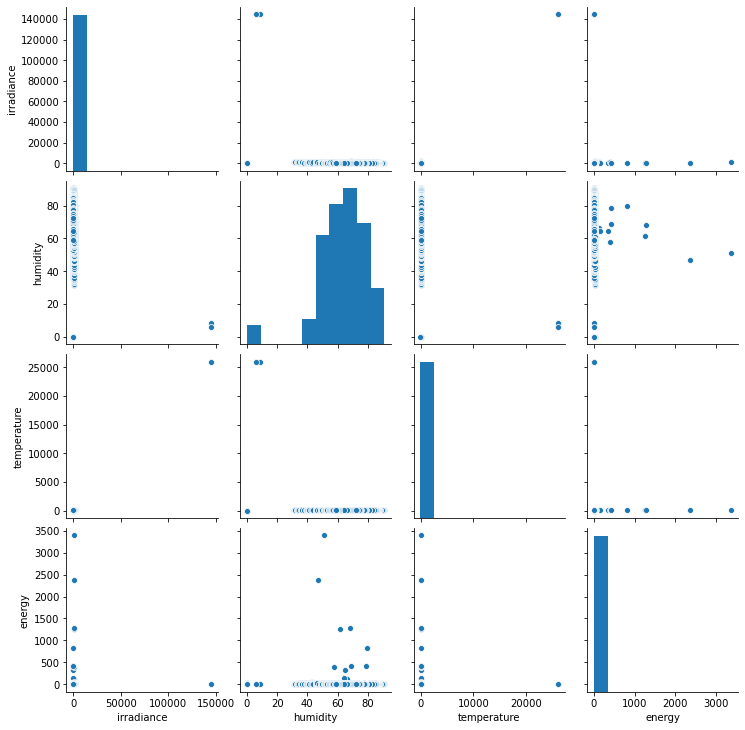

In [16]:
sns.pairplot(qcell) ## apprently temperature and irradiance is dependent to each other, we need to take outliner out

## Data cleaing- remove outlier 

## Data entries at irradiance is max 

In [17]:
print(qcell[qcell.irradiance == qcell.irradiance.max()]) ## We need to drop abnomality point 

              datetime  irradiance  humidity  temperature  energy
91541  12/2/2016 10:15    144552.0     8.636      25948.8     1.0
91542  12/2/2016 10:20    144552.0     6.035      25917.3     3.0


In [18]:
qcell_new = qcell[(qcell.irradiance != 144552.0 )] ## Two entries are dropped 
qcell_new

,datetime,irradiance,humidity,temperature,energy
0,1/1/2016 0:00,0.000,72.7,21.556,0.00
1,1/1/2016 0:05,0.000,73.0,21.556,0.00
2,1/1/2016 0:10,0.396,73.3,21.500,0.00
3,1/1/2016 0:15,0.791,73.3,21.389,0.00
4,1/1/2016 0:20,0.396,73.3,21.278,0.00
...,...,...,...,...,...
199995,1/7/2018 17:15,193.286,58.1,25.556,7.73
199996,1/7/2018 17:20,557.061,57.1,25.889,8.01
199997,1/7/2018 17:25,528.811,58.2,25.667,10.39
199998,1/7/2018 17:30,347.915,58.3,25.889,8.74


## Data Visualization 

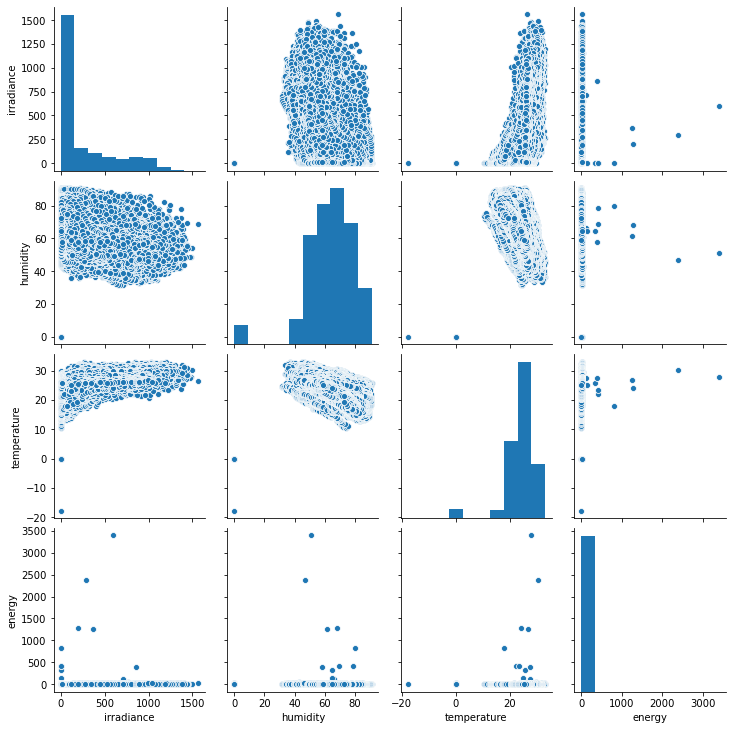

In [19]:
## replot pairplot after removing outliers
sns.pairplot(qcell_new)

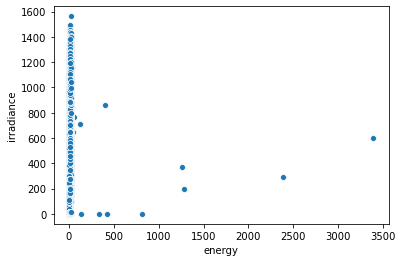

In [20]:
sns.scatterplot(x = 'energy', y = 'irradiance' , data = qcell_new)

## Correlation Strength Plot and Table

In [21]:
my_corr = qcell_new.corr()
my_corr 

,irradiance,humidity,temperature,energy
irradiance,1.000000,-0.406045,0.496151,0.468298
humidity,-0.406045,1.000000,0.204242,-0.263964
temperature,0.496151,0.204242,1.000000,0.207086
energy,0.468298,-0.263964,0.207086,1.000000


In [22]:
## nonzero Energy dataset
qcell_nonzero= qcell_new[(qcell_new.energy > 1)]
qcell_nonzero

,datetime,irradiance,humidity,temperature,energy
120,1/1/2016 10:05,201.709,80.1,17.778,2.00
121,1/1/2016 10:10,226.230,76.1,18.278,3.00
122,1/1/2016 10:15,247.983,73.0,19.000,4.00
123,1/1/2016 10:20,272.505,70.7,19.500,5.00
124,1/1/2016 10:25,285.161,70.2,20.056,6.00
...,...,...,...,...,...
199995,1/7/2018 17:15,193.286,58.1,25.556,7.73
199996,1/7/2018 17:20,557.061,57.1,25.889,8.01
199997,1/7/2018 17:25,528.811,58.2,25.667,10.39
199998,1/7/2018 17:30,347.915,58.3,25.889,8.74


In [23]:
my_corr_1 = qcell_nonzero.corr()
my_corr_1

,irradiance,humidity,temperature,energy
irradiance,1.000000,-0.061716,0.443586,0.236796
humidity,-0.061716,1.000000,0.541575,-0.096654
temperature,0.443586,0.541575,1.000000,0.054781
energy,0.236796,-0.096654,0.054781,1.000000


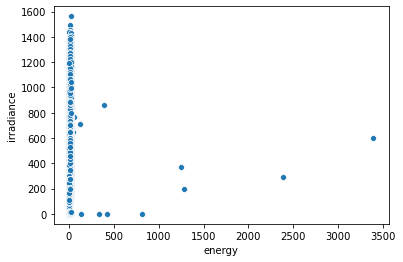

In [24]:
sns.scatterplot(x = 'energy', y = 'irradiance' , data = qcell_nonzero)

## Heatmap

__*Check feature correlations*__

- Strong corrleation(inter)
    - temperature and irradiance with 0.5 meaning highly dependency
- Medium correlation
    - energy and irradiance(0.47), temperature and irradiance(0.5) dependency
- Meedium to Weak correlation
    - energy and humidity(-0.26), energy and temperature(0.21)

Text(0.5, 1.0, 'Correlation Between Feeling Thermometers')

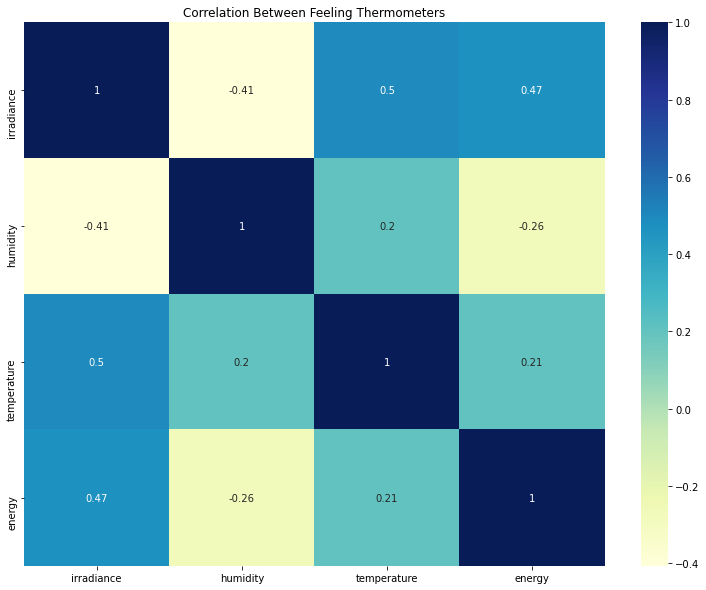

In [25]:
plt.figure(figsize = (13,10))
sns.heatmap(my_corr, annot=True, cmap='YlGnBu')
plt.title("Correlation Between Feeling Thermometers")

Text(0.5, 1.0, 'Datetime vs. Energy trendchart')

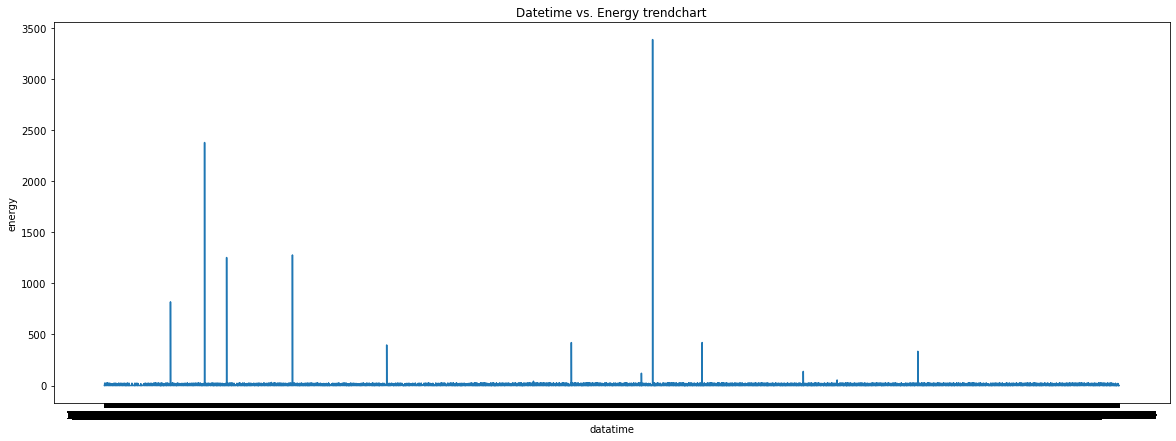

In [26]:
## Check datatime vs. Energy
plt.figure(figsize=(20,7))
sns.lineplot(x='datetime', y='energy', data=qcell_new)
plt.xlabel('datatime')
plt.ylabel('energy')
plt.title('Datetime vs. Energy trendchart')

Text(0.5, 1.0, 'Datetime vs. irradiance trendchart')

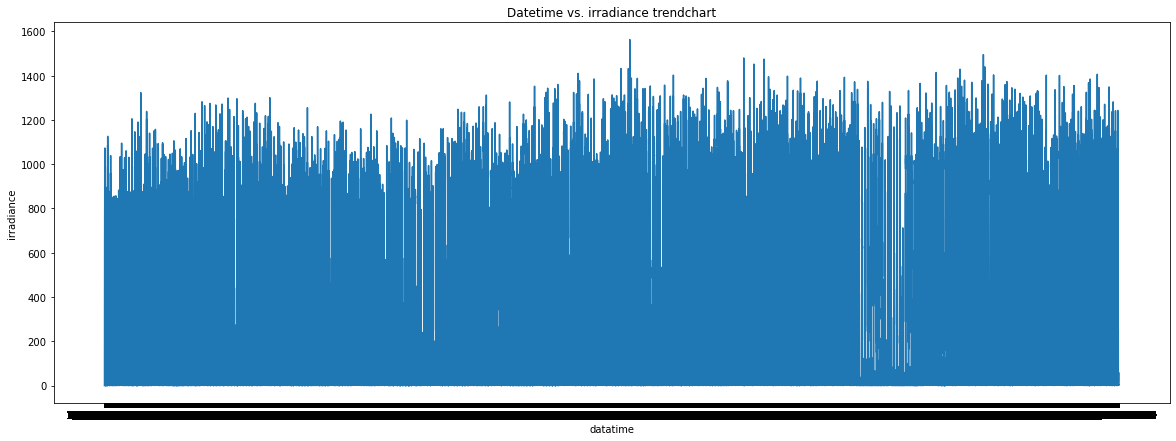

In [27]:
## Check datatime vs. Energy
plt.figure(figsize=(20,7))
sns.lineplot(x='datetime', y='irradiance', data=qcell_new)
plt.xlabel('datatime')
plt.ylabel('irradiance')
plt.title('Datetime vs. irradiance trendchart')

## Reconstruct timedata  : The question is to predict the next 30 days energy production. We can consider the datetime in daily basis or monthly basis 

In [28]:
## Data aggregation (qcell_new) - making dataframe in day, week and month base
qcell

,datetime,irradiance,humidity,temperature,energy
0,1/1/2016 0:00,0.000,72.7,21.556,0.00
1,1/1/2016 0:05,0.000,73.0,21.556,0.00
2,1/1/2016 0:10,0.396,73.3,21.500,0.00
3,1/1/2016 0:15,0.791,73.3,21.389,0.00
4,1/1/2016 0:20,0.396,73.3,21.278,0.00
...,...,...,...,...,...
199995,1/7/2018 17:15,193.286,58.1,25.556,7.73
199996,1/7/2018 17:20,557.061,57.1,25.889,8.01
199997,1/7/2018 17:25,528.811,58.2,25.667,10.39
199998,1/7/2018 17:30,347.915,58.3,25.889,8.74


In [29]:
qcell['datetime'] = pd.to_datetime(qcell["datetime"])
qcell.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   datetime     200000 non-null  datetime64[ns]
 1   irradiance   200000 non-null  float64       
 2   humidity     200000 non-null  float64       
 3   temperature  200000 non-null  float64       
 4   energy       200000 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.6 MB


In [30]:
qcell['new_date'] = [d.date() for d in qcell['datetime']]
qcell

,datetime,irradiance,humidity,temperature,energy,new_date
0,2016-01-01 00:00:00,0.000,72.7,21.556,0.00,2016-01-01
1,2016-01-01 00:05:00,0.000,73.0,21.556,0.00,2016-01-01
2,2016-01-01 00:10:00,0.396,73.3,21.500,0.00,2016-01-01
3,2016-01-01 00:15:00,0.791,73.3,21.389,0.00,2016-01-01
4,2016-01-01 00:20:00,0.396,73.3,21.278,0.00,2016-01-01
...,...,...,...,...,...,...
199995,2018-01-07 17:15:00,193.286,58.1,25.556,7.73,2018-01-07
199996,2018-01-07 17:20:00,557.061,57.1,25.889,8.01,2018-01-07
199997,2018-01-07 17:25:00,528.811,58.2,25.667,10.39,2018-01-07
199998,2018-01-07 17:30:00,347.915,58.3,25.889,8.74,2018-01-07


In [31]:
## Extract year, month, date from date
qcell['year'] = pd.DatetimeIndex(qcell['new_date']).year
qcell['month'] = pd.DatetimeIndex(qcell['new_date']).month
qcell['day'] = pd.DatetimeIndex(qcell['new_date']).day
qcell.describe()

,irradiance,humidity,temperature,energy,year,month,day
count,200000.000000,200000.000000,200000.000000,200000.00000,200000.000000,200000.000000,200000.000000
mean,232.301818,63.110297,24.211174,4.60510,2016.508955,6.431865,15.538990
std,565.702460,16.145131,82.107061,12.20258,0.517679,3.448559,8.817239
min,0.000000,0.000000,-17.778000,0.00000,2016.000000,1.000000,1.000000
25%,1.978000,54.700000,22.167000,0.00000,2016.000000,3.000000,8.000000
50%,4.351000,64.700000,24.667000,0.00000,2016.000000,6.000000,15.000000
75%,387.292250,73.900000,27.056000,9.00000,2017.000000,9.000000,23.000000
max,144552.000000,90.800000,25948.800000,3390.00000,2018.000000,12.000000,31.000000


In [32]:
qcell

,datetime,irradiance,humidity,temperature,energy,new_date,year,month,day
0,2016-01-01 00:00:00,0.000,72.7,21.556,0.00,2016-01-01,2016,1,1
1,2016-01-01 00:05:00,0.000,73.0,21.556,0.00,2016-01-01,2016,1,1
2,2016-01-01 00:10:00,0.396,73.3,21.500,0.00,2016-01-01,2016,1,1
3,2016-01-01 00:15:00,0.791,73.3,21.389,0.00,2016-01-01,2016,1,1
4,2016-01-01 00:20:00,0.396,73.3,21.278,0.00,2016-01-01,2016,1,1
...,...,...,...,...,...,...,...,...,...
199995,2018-01-07 17:15:00,193.286,58.1,25.556,7.73,2018-01-07,2018,1,7
199996,2018-01-07 17:20:00,557.061,57.1,25.889,8.01,2018-01-07,2018,1,7
199997,2018-01-07 17:25:00,528.811,58.2,25.667,10.39,2018-01-07,2018,1,7
199998,2018-01-07 17:30:00,347.915,58.3,25.889,8.74,2018-01-07,2018,1,7


In [33]:
df = qcell.groupby('new_date').agg({'irradiance' : 'mean',
                           'humidity' :'mean',
                           'temperature' : 'mean',
                           'energy' :'mean'})

In [34]:
df

,irradiance,humidity,temperature,energy
new_date,,,,
2016-01-01,197.342010,68.172822,21.782265,4.160279
2016-01-02,216.570279,60.756098,21.582481,4.436481
2016-01-03,165.376111,67.864111,19.852902,3.303519
2016-01-04,217.270352,62.562718,20.524801,4.283206
2016-01-05,206.058324,68.461324,21.783226,4.060244
...,...,...,...,...
2018-01-03,220.508143,61.554007,21.172115,4.554390
2018-01-04,202.483286,60.722997,22.264449,3.378746
2018-01-05,202.773394,61.946690,21.543195,3.878432


In [35]:
df.corr()

,irradiance,humidity,temperature,energy
irradiance,1.000000,0.148427,0.806662,0.510890
humidity,0.148427,1.000000,0.230526,-0.229735
temperature,0.806662,0.230526,1.000000,0.110044
energy,0.510890,-0.229735,0.110044,1.000000


Text(0.5, 1.0, 'Correlation Between Feeling Thermometers')

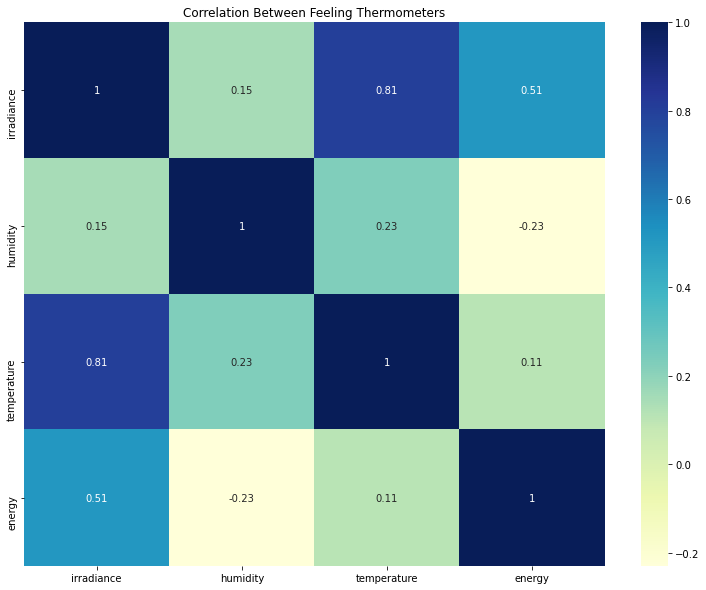

In [36]:
plt.figure(figsize = (13,10))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.title("Correlation Between Feeling Thermometers")

In [37]:
df

,irradiance,humidity,temperature,energy
new_date,,,,
2016-01-01,197.342010,68.172822,21.782265,4.160279
2016-01-02,216.570279,60.756098,21.582481,4.436481
2016-01-03,165.376111,67.864111,19.852902,3.303519
2016-01-04,217.270352,62.562718,20.524801,4.283206
2016-01-05,206.058324,68.461324,21.783226,4.060244
...,...,...,...,...
2018-01-03,220.508143,61.554007,21.172115,4.554390
2018-01-04,202.483286,60.722997,22.264449,3.378746
2018-01-05,202.773394,61.946690,21.543195,3.878432


In [38]:
df.to_csv('file1.csv')

In [39]:
df = pd.read_csv('file1.csv')
df

,new_date,irradiance,humidity,temperature,energy
0,2016-01-01,197.342010,68.172822,21.782265,4.160279
1,2016-01-02,216.570279,60.756098,21.582481,4.436481
2,2016-01-03,165.376111,67.864111,19.852902,3.303519
3,2016-01-04,217.270352,62.562718,20.524801,4.283206
4,2016-01-05,206.058324,68.461324,21.783226,4.060244
...,...,...,...,...,...
716,2018-01-03,220.508143,61.554007,21.172115,4.554390
717,2018-01-04,202.483286,60.722997,22.264449,3.378746
718,2018-01-05,202.773394,61.946690,21.543195,3.878432
719,2018-01-06,2.416056,62.930000,22.169650,0.005938


## Energy vs. Date Trend Chart

Text(0.5, 1.0, 'Date vs. Energy trendchart')

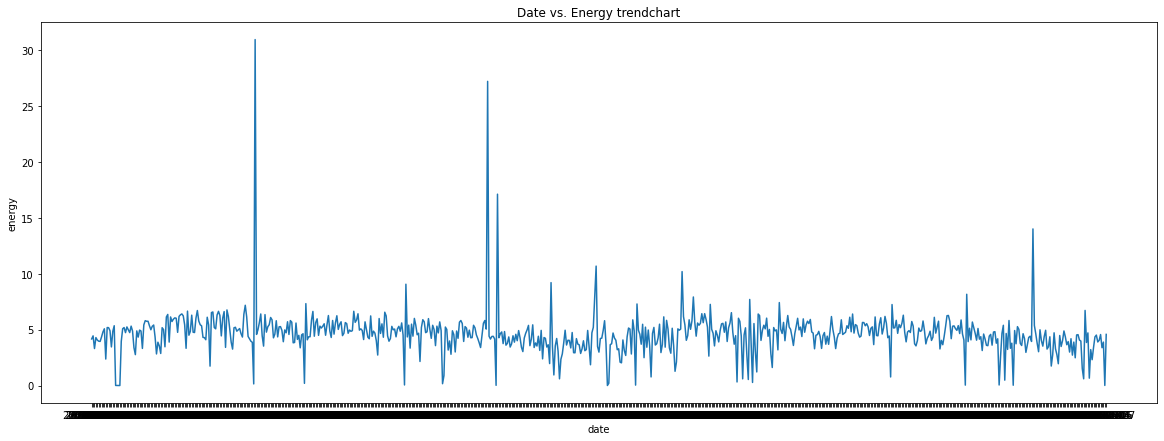

In [40]:
## Check datatime vs. Energy
plt.figure(figsize=(20,7))
sns.lineplot(x='new_date', y='energy', data=df)
plt.xlabel('date')
plt.ylabel('energy')
plt.title('Date vs. Energy trendchart')

In [41]:
print(df[df.irradiance == df.irradiance.max()]) 

       new_date   irradiance   humidity  temperature    energy
326  2016-12-02  2398.612058  66.845442   401.037572  9.195652


In [42]:
df1 = df[(df.irradiance < 2398) ] ## Two entries are dropped 
df1.describe()

,irradiance,humidity,temperature,energy
count,720.000000,720.000000,720.000000,720.000000
mean,229.562615,63.171909,23.963677,4.612949
std,80.172967,12.437634,4.569808,1.982227
min,0.000000,0.000000,0.000000,0.000000
25%,196.377898,60.366638,22.944485,3.894872
50%,241.828443,64.358681,24.739164,4.666086
75%,282.620692,68.808028,26.390994,5.334495
max,503.988687,85.630556,29.621708,30.917808


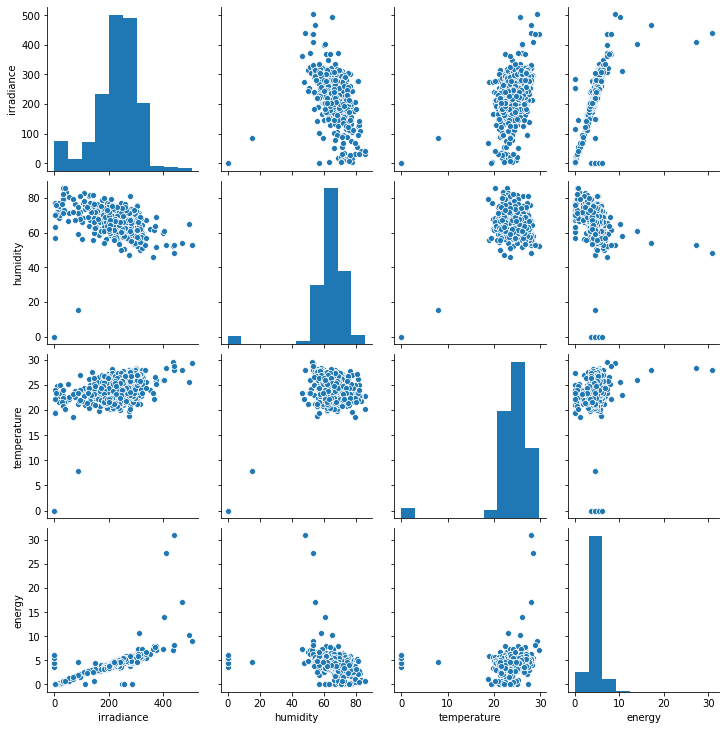

In [43]:
## replot pairplot after removing outliers
sns.pairplot(df1)

Text(0.5, 1.0, 'Date vs. Energy trendchart')

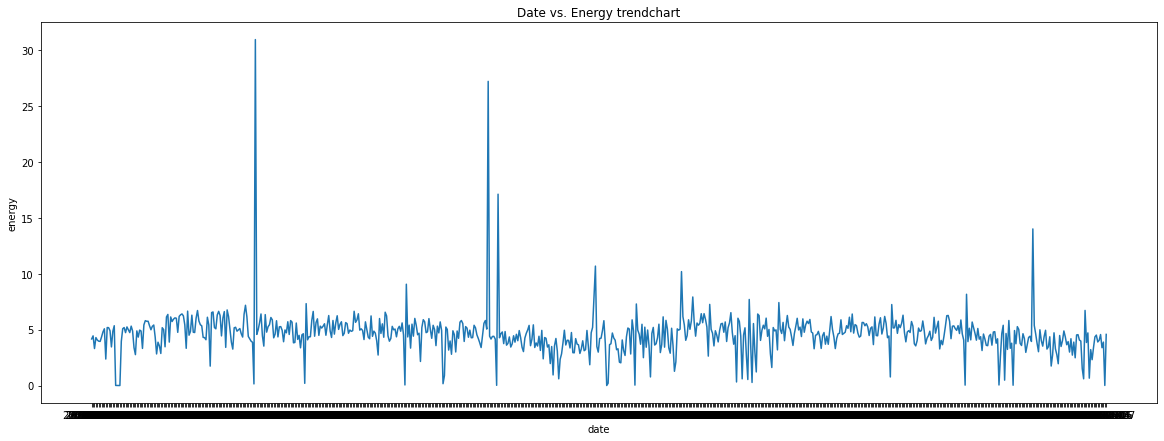

In [44]:
## Check datatime vs. Energy
plt.figure(figsize=(20,7))
sns.lineplot(x='new_date', y='energy', data=df1)
plt.xlabel('date')
plt.ylabel('energy')
plt.title('Date vs. Energy trendchart')

Text(0.5, 1.0, 'Date vs. Irradiance trendchart')

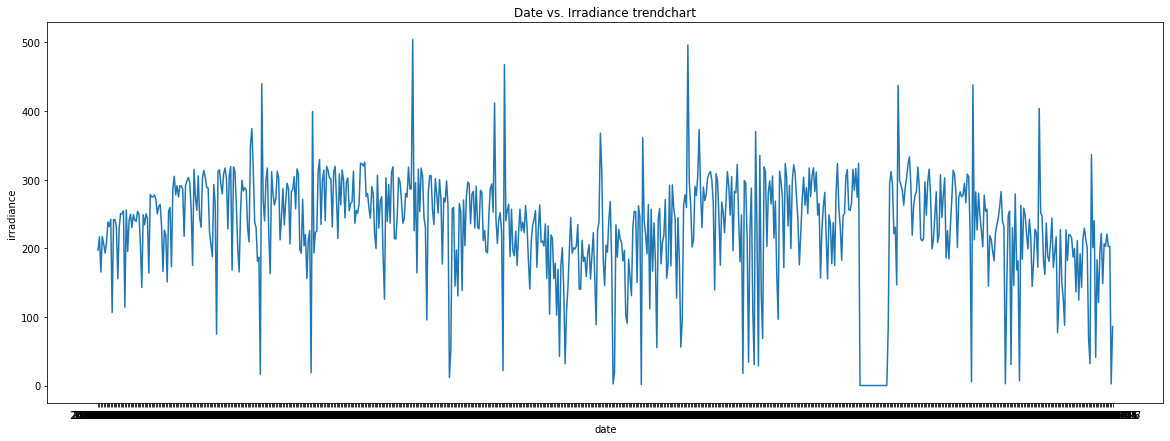

In [45]:
## Check datatime vs. Energy
plt.figure(figsize=(20,7))
sns.lineplot(x='new_date', y='irradiance', data=df1)
plt.xlabel('date')
plt.ylabel('irradiance')
plt.title('Date vs. Irradiance trendchart')

Text(0.5, 1.0, 'Date vs. Temperature trendchart')

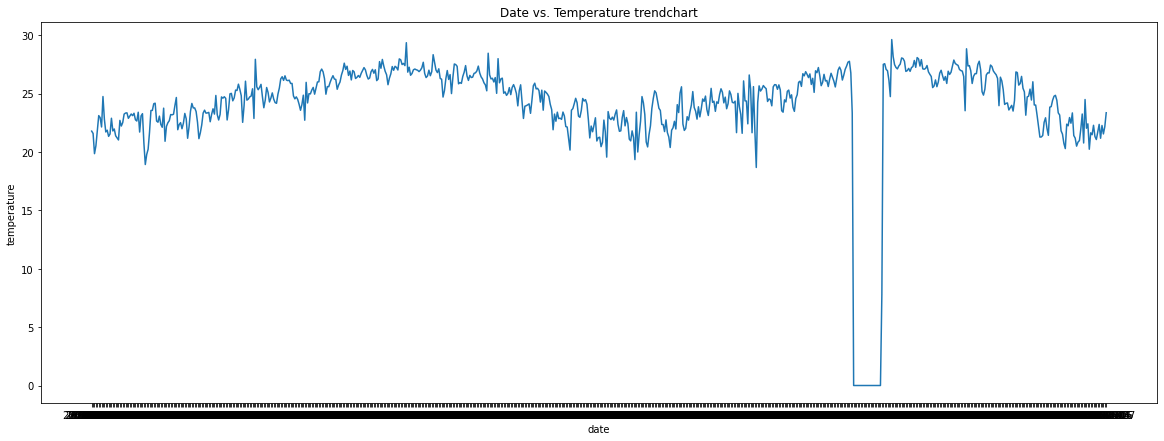

In [46]:
## Check datatime vs. Temperature
plt.figure(figsize=(20,7))
sns.lineplot(x='new_date', y='temperature', data=df1)
plt.xlabel('date')
plt.ylabel('temperature')
plt.title('Date vs. Temperature trendchart')

Text(0.5, 1.0, 'Date vs. Humidity trendchart')

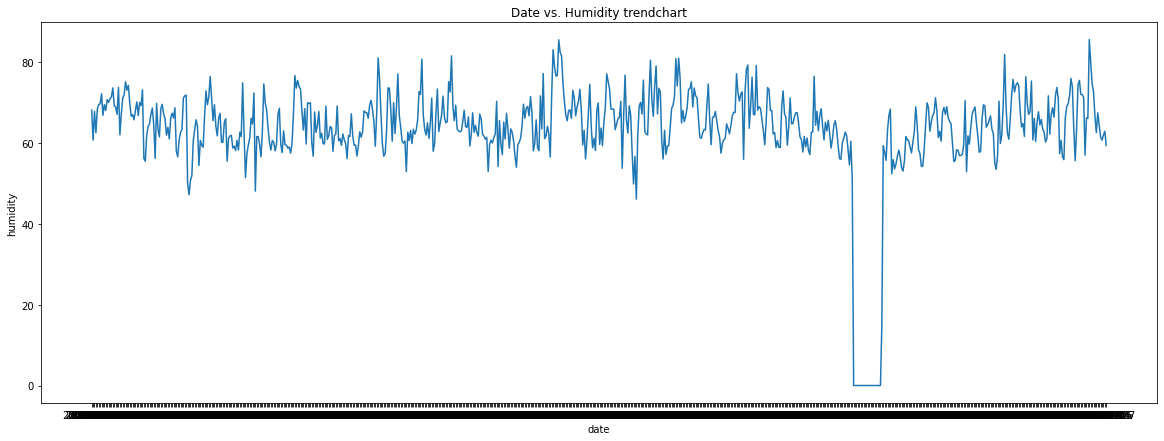

In [47]:
## Check datatime vs. humidity
plt.figure(figsize=(20,7))
sns.lineplot(x='new_date', y='humidity', data=df1)
plt.xlabel('date')
plt.ylabel('humidity')
plt.title('Date vs. Humidity trendchart')

## Need to remove Temperature = 0 entries

In [48]:
df2 = df1[(df1.temperature > 10) ] ## Two entries are dropped 
df2.describe()

,irradiance,humidity,temperature,energy
count,699.000000,699.000000,699.000000,699.000000
mean,236.335742,65.047926,24.672448,4.599969
std,70.963256,6.179898,2.044496,2.007507
min,1.428236,46.148551,18.670160,0.000000
25%,201.016179,60.696701,23.154047,3.876716
50%,243.754181,64.735192,24.842836,4.655052
75%,283.712328,68.927083,26.433266,5.306250
max,503.988687,85.630556,29.621708,30.917808


Text(0.5, 1.0, 'Date vs. Energy trendchart')

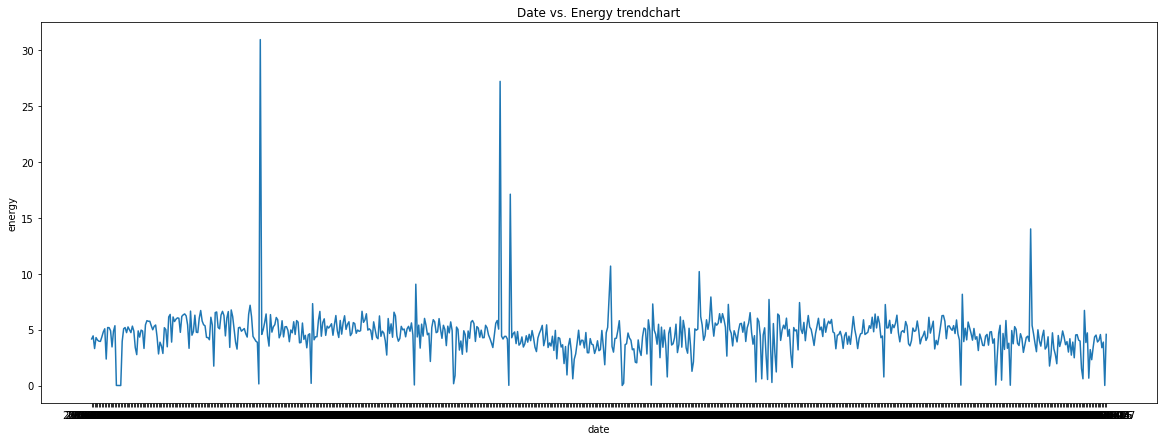

In [49]:
## Check datatime vs. Energy
plt.figure(figsize=(20,7))
sns.lineplot(x='new_date', y='energy', data=df2)
plt.xlabel('date')
plt.ylabel('energy')
plt.title('Date vs. Energy trendchart')

Text(0.5, 1.0, 'Date vs. Irradiance trendchart')

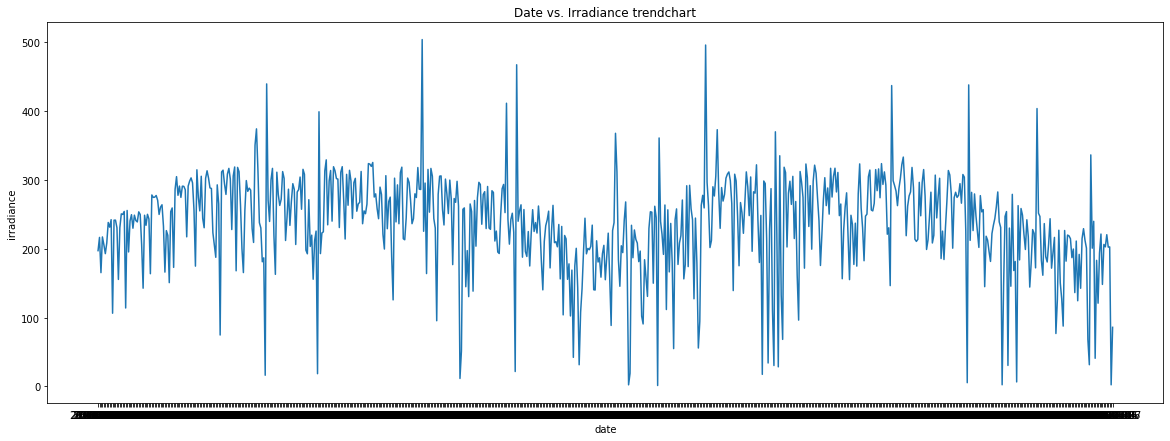

In [50]:
## Check datatime vs. Energy
plt.figure(figsize=(20,7))
sns.lineplot(x='new_date', y='irradiance', data=df2)
plt.xlabel('date')
plt.ylabel('irradiance')
plt.title('Date vs. Irradiance trendchart')

Text(0.5, 1.0, 'Date vs. Temperature trendchart')

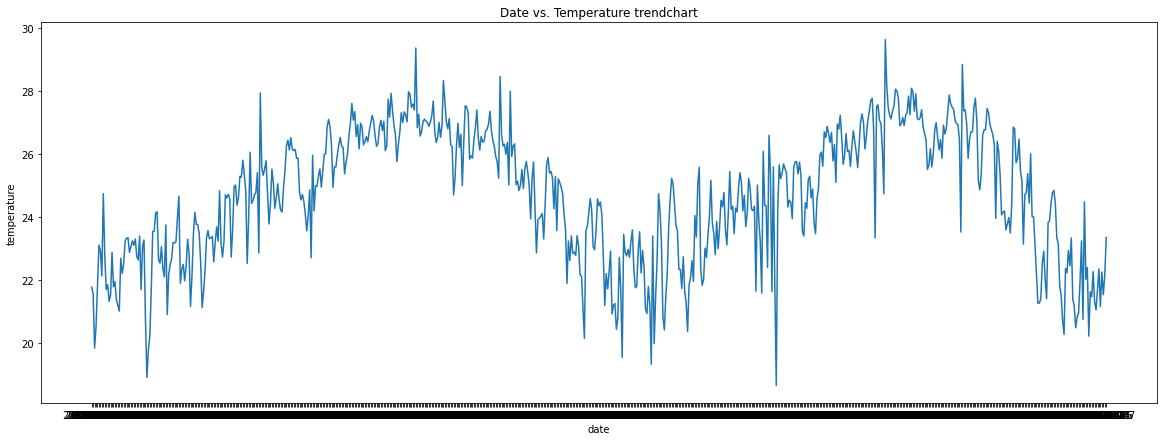

In [51]:
## Check datatime vs. Temperature
plt.figure(figsize=(20,7))
sns.lineplot(x='new_date', y='temperature', data=df2)
plt.xlabel('date')
plt.ylabel('temperature')
plt.title('Date vs. Temperature trendchart')

Text(0.5, 1.0, 'Date vs. Humidity trendchart')

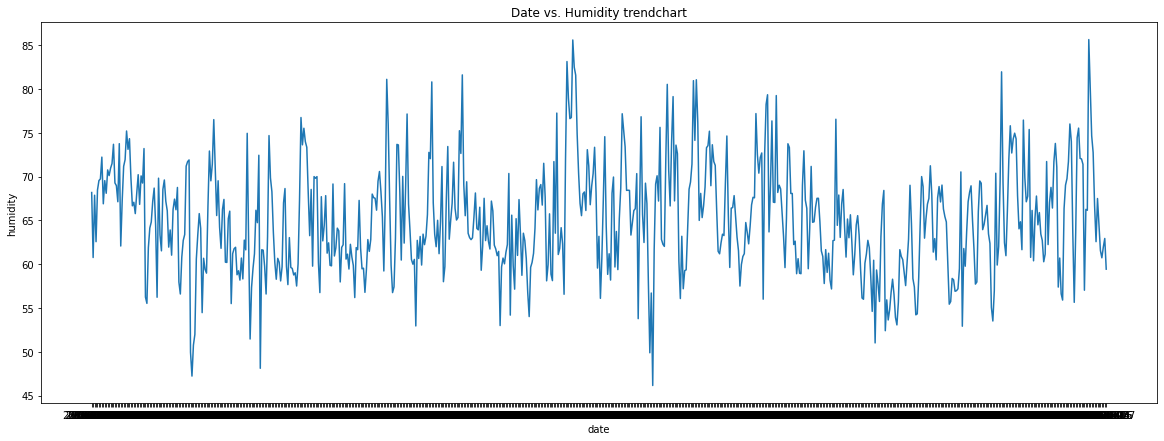

In [52]:
## Check datatime vs. humidity
plt.figure(figsize=(20,7))
sns.lineplot(x='new_date', y='humidity', data=df2)
plt.xlabel('date')
plt.ylabel('humidity')
plt.title('Date vs. Humidity trendchart')

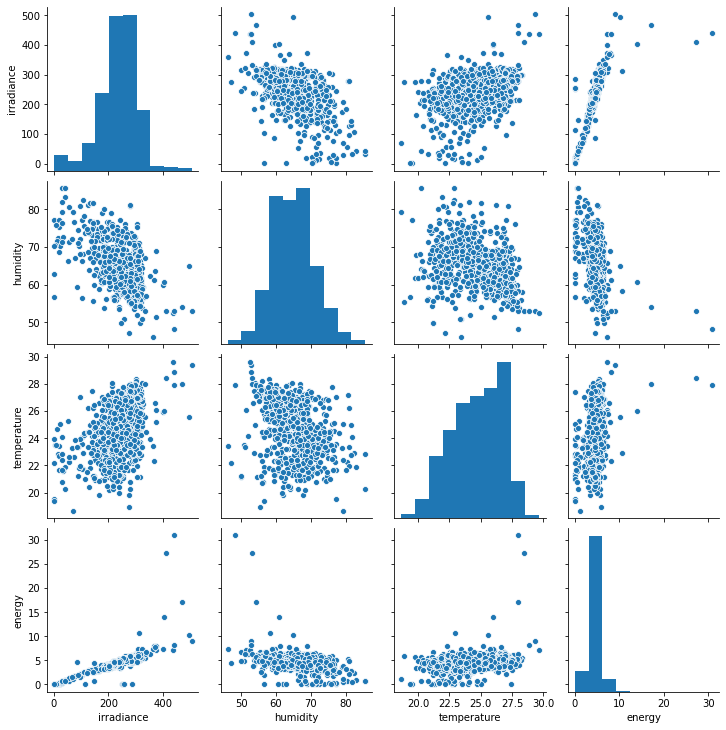

In [53]:
## replot pairplot after removing outliers
sns.pairplot(df2)

In [54]:
df2.isnull().sum()

new_date       0
irradiance     0
humidity       0
temperature    0
energy         0
dtype: int64

In [55]:
## Indexing with Time Series DATA
df3 = df2.set_index('new_date')
df3

,irradiance,humidity,temperature,energy
new_date,,,,
2016-01-01,197.342010,68.172822,21.782265,4.160279
2016-01-02,216.570279,60.756098,21.582481,4.436481
2016-01-03,165.376111,67.864111,19.852902,3.303519
2016-01-04,217.270352,62.562718,20.524801,4.283206
2016-01-05,206.058324,68.461324,21.783226,4.060244
...,...,...,...,...
2018-01-03,220.508143,61.554007,21.172115,4.554390
2018-01-04,202.483286,60.722997,22.264449,3.378746
2018-01-05,202.773394,61.946690,21.543195,3.878432


In [56]:
y = df3['energy'] 
y['2016':]

new_date
2016-01-01    4.160279
2016-01-02    4.436481
2016-01-03    3.303519
2016-01-04    4.283206
2016-01-05    4.060244
                ...   
2018-01-03    4.554390
2018-01-04    3.378746
2018-01-05    3.878432
2018-01-06    0.005938
2018-01-07    4.566557
Name: energy, Length: 699, dtype: float64

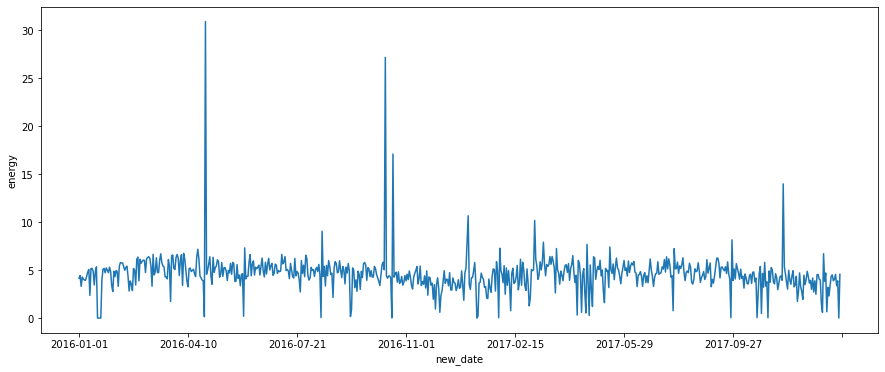

In [57]:
y.plot(figsize=(15, 6))
plt.ylabel('energy')
plt.show()

In [58]:
y1 = df3['irradiance'] 

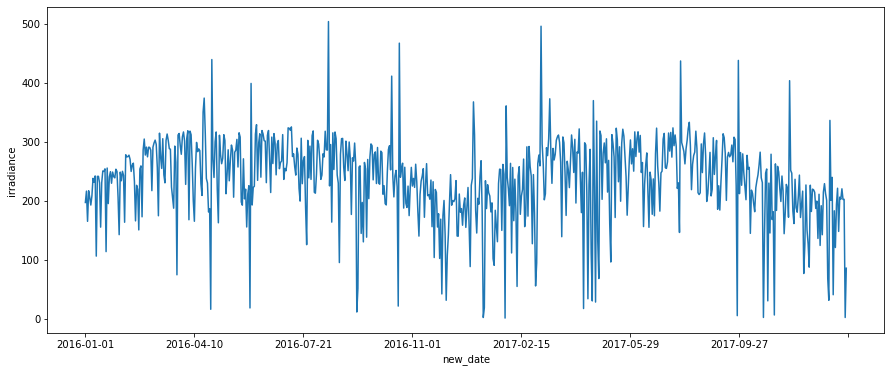

In [59]:
y1.plot(figsize=(15, 6))
plt.ylabel('irradiance')
plt.show()

In [60]:
y2 = df3['temperature'] 

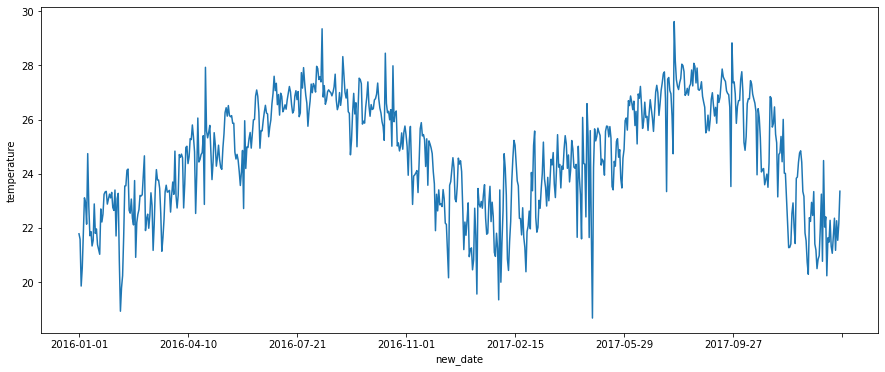

In [61]:
y2.plot(figsize=(15, 6))
plt.ylabel('temperature')
plt.show()

In [62]:
y3 = df3['humidity'] 

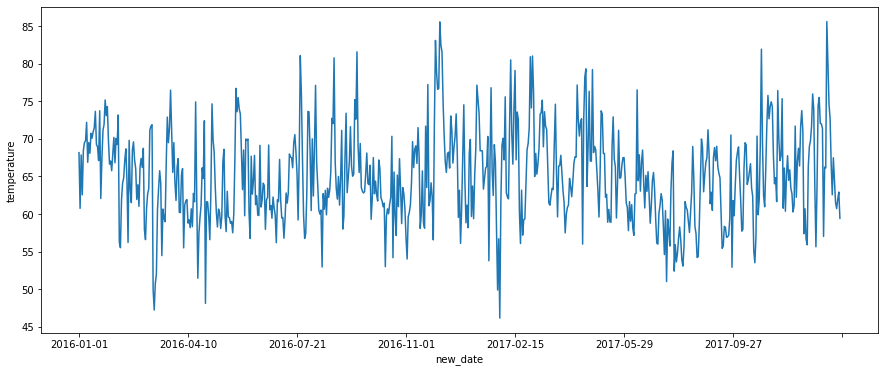

In [63]:
y3.plot(figsize=(15, 6))
plt.ylabel('temperature')
plt.show()

# Profiling Report

In [65]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, 
                        title='Pandas Profiling Report',
                        html={'style':{'full_width':True}},
                       minimal=True)
profile.to_notebook_iframe()

In [66]:
from pandas_profiling import ProfileReport
profile = ProfileReport(qcell, 
                        title='Pandas Profiling Report',
                        html={'style':{'full_width':True}},
                       minimal=True)
profile.to_notebook_iframe()